In [51]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score



In [52]:
df_hr = pd.read_csv("HR_DATASET.csv")
df_hr.shape

(917, 35)

In [53]:
df_hr.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,430,Research & Development,24,4,Life Sciences,1,772,1,Male,80,3,2,Laboratory Technician,4,Married,5309,21146,1,Y,No,15,3,4,80,2,10,2,3,10,8,4,7
6,38,No,Travel_Rarely,268,Research & Development,2,5,Medical,1,773,4,Male,92,3,1,Research Scientist,3,Married,3057,20471,6,Y,Yes,13,3,2,80,1,6,0,1,1,0,0,1
7,34,No,Travel_Rarely,167,Research & Development,8,5,Life Sciences,1,775,2,Female,32,3,2,Manufacturing Director,1,Divorced,5121,4187,3,Y,No,14,3,3,80,1,7,3,3,0,0,0,0
8,52,No,Travel_Rarely,621,Sales,3,4,Marketing,1,776,3,Male,31,2,4,Manager,1,Married,16856,10084,1,Y,No,11,3,1,80,0,34,3,4,34,6,1,16
9,33,Yes,Travel_Rarely,527,Research & Development,1,4,Other,1,780,4,Male,63,3,1,Research Scientist,4,Single,2686,5207,1,Y,Yes,13,3,3,80,0,10,2,2,10,9,7,8


In [54]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

In [55]:
# Data is clean
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [56]:
#No duplicate data
df_hr.duplicated().sum()

0

In [57]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,36.938931,785.711014,9.294438,2.921483,1.000000,1413.466739,2.738277,66.231189,2.721919,2.044711,2.688113,6452.293348,14428.468920,2.696838,15.214831,3.149400,2.637950,80.000000,0.821156,11.179935,2.791712,2.760087,6.972737,4.217012,2.147219,4.062159
std,8.984981,401.902148,8.092566,1.020717,0.000000,388.606884,1.103382,20.237536,0.720936,1.100400,1.110097,4685.137761,7188.332799,2.489217,3.640007,0.356677,1.078673,0.000000,0.864555,7.802790,1.292917,0.708047,5.951250,3.588223,3.176250,3.571395
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,444.000000,2.000000,2.000000,1.000000,1084.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2933.000000,8018.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,772.000000,7.000000,3.000000,1.000000,1425.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4877.000000,14255.000000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1141.000000,14.000000,4.000000,1.000000,1737.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8103.000000,20763.000000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [58]:
# checking for one just for learning
#H0: Age doesnt have an impact on the attrition
#H1: Age has an impact on the attrition

import pandas as pd
import scipy.stats as stats

age_attrition_yes = df_hr[df_hr['Attrition'] == 'Yes']['Age']
age_attrition_no = df_hr[df_hr['Attrition'] == 'No']['Age']

In [59]:
shapiro_yes = stats.shapiro(age_attrition_yes)
shapiro_no = stats.shapiro(age_attrition_no)

In [60]:
print("Shapiro-Wilk Test for 'Yes' group:", shapiro_yes)
print("Shapiro-Wilk Test for 'No' group:", shapiro_no)
#data is not normal (Ho:normal;H1:not normal)

Shapiro-Wilk Test for 'Yes' group: ShapiroResult(statistic=0.9442303776741028, pvalue=8.66624486661749e-06)
Shapiro-Wilk Test for 'No' group: ShapiroResult(statistic=0.9809387922286987, pvalue=2.0482596951865162e-08)


In [61]:
if shapiro_yes.pvalue > 0.05 and shapiro_no.pvalue > 0.05:
    # If both groups are normally distributed
    ttest = stats.ttest_ind(age_attrition_yes, age_attrition_no)
    print("Two-sample t-test:", ttest)
else:
    # If either group is not normally distributed
    mannwhitney = stats.mannwhitneyu(age_attrition_yes, age_attrition_no)
    print("Mann-Whitney U test:", mannwhitney)
    
#This means we reject the null hypothesis and conclude that there is a statistically significant difference in ages 
#between employees who left (attrition = Yes) and those who stayed (attrition = No).

#Also Continuous vs. Categorical: t-test or Mann-Whitney U test
# Categorical vs. Categorical: Chi-square test

Mann-Whitney U test: MannwhitneyuResult(statistic=45436.0, pvalue=8.838045851314623e-06)


In [62]:
#This is an imbalanced dataset
age_attrition_yes.value_counts().sum()

154

In [63]:
age_attrition_no.value_counts().sum()

763

In [64]:
# Educstion and Edication field are the same: hence dropping
#employee count,Employee number,over 18 and std hours are of no use. Hence dropping
df_hr = df_hr.drop(['EducationField','EmployeeCount','EmployeeNumber','StandardHours','Over18',],axis=1)

In [65]:
df_hr.shape

(917, 30)

In [66]:
# Convert 'Attrition' to binary format, alternately can use label encoder too
df_hr['Attrition'] = df_hr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [67]:
# Define categorical and numerical columns
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EnvironmentSatisfaction', 
                    'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
                    'MaritalStatus', 'OverTime', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
categorical_df = df_hr[categorical_cols]


In [68]:
categorical_df.head()

,BusinessTravel,Department,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel
0,Travel_Rarely,Sales,2,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0
1,Travel_Frequently,Research & Development,1,3,Male,2,2,Research Scientist,2,Married,No,4,4,1
2,Travel_Rarely,Research & Development,2,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0
3,Travel_Frequently,Research & Development,4,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0
4,Travel_Rarely,Research & Development,1,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1


In [69]:
categorical_df.shape

(917, 14)

In [70]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [71]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                  'TrainingTimesLastYear', 'WorkLifeBalance']

In [72]:
numerical_df = df_hr[numerical_cols]


In [73]:
numerical_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,41,1102,1,94,5993,8,11,8,0,1
1,49,279,8,61,5130,1,23,10,3,3
2,37,1373,2,92,2090,6,15,7,3,3
3,33,1392,3,56,2909,1,11,8,3,3
4,27,591,2,40,3468,9,12,6,3,3


In [24]:
from sklearn.pipeline import Pipeline

In [74]:
# Define the preprocessing pipelines
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [75]:
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [76]:
from sklearn.compose import ColumnTransformer

In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])

# Preprocess features
X = df_hr[numerical_cols + categorical_cols]
X_transformed = preprocessor.fit_transform(X)

# Add the 'Attrition' column
y = df_hr['Attrition']

In [78]:
from sklearn.compose import ColumnTransformer

In [79]:
feature_names = (numerical_cols + 
                 list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)))

In [80]:
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)


In [81]:
final_df = pd.concat([X_transformed_df, y.reset_index(drop=True)], axis=1)


In [82]:
final_df.head()


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,Attrition
0,0.452231,0.787410,-1.025505,1.372893,-0.098085,2.131617,-1.158550,-0.407761,-2.160414,-2.487189,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
1,1.343091,-1.261470,-0.160041,-0.258630,-0.282385,-0.682047,2.139946,-0.151302,0.161187,0.339022,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0
2,0.006800,1.462071,-0.901867,1.274013,-0.931600,1.327713,-0.059052,-0.535990,0.161187,0.339022,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
3,-0.438630,1.509372,-0.778229,-0.505831,-0.756696,-0.682047,-1.158550,-0.407761,0.161187,0.339022,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0
4,-1.106775,-0.484738,-0.901867,-1.296872,-0.637318,2.533569,-0.883676,-0.664219,0.161187,0.339022,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0

In [83]:
final_df.shape

(917, 65)

In [84]:
final_X = final_df.drop('Attrition', axis =1)
final_Y = final_df['Attrition']

In [85]:
final_df = sm.add_constant(final_df)

X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (733, 64)
y_train (733,)
X_test (184, 64)
y_test (184,)


In [86]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [87]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: 0.279460
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  733
Model:                          Logit   Df Residuals:                      682
Method:                           MLE   Df Model:                           50
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.3852
Time:                        20:47:10   Log-Likelihood:                -204.84
converged:                      False   LL-Null:                       -333.20
Covariance Type:            nonrobust   LLR p-value:                 1.431e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                   0.0642      0.174      0.369      0.712      -0.277       0.

In [88]:
print('AIC:', logreg.aic)

AIC: 511.68820418608743


In [89]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
Age,1.066343
DailyRate,0.912885
DistanceFromHome,1.583545
HourlyRate,1.220705
MonthlyIncome,0.342306
NumCompaniesWorked,1.713084
PercentSalaryHike,0.853072
TotalWorkingYears,0.477864
TrainingTimesLastYear,0.635578
WorkLifeBalance,0.740394


In [90]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)
y_pred_prob.sample(10)

876   0.199169
794   0.067239
767   0.016337
217   0.031261
890   0.546554
309   0.113812
887   0.010836
403   0.000000
85    0.309641
445   0.040577
dtype: float64

From this we see that the model is always classifying it as 'not an attrition', while this is not true.
So, I am assuming this is because of either too many columns or due to the issue arising due to an imbalanced dataset.
Now we see that the number of 1 for attrition is 154, with around 763 values for 0 (not an attrition)

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Load the dataset
hr_data = pd.read_csv("HR_DATASET.csv")

# Convert 'Attrition' to binary format
hr_data['Attrition'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define categorical and numerical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_cols = hr_data.drop(columns=categorical_cols + ['Attrition']).select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocess categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data into training and testing sets
X = hr_data.drop('Attrition', axis=1)
y = hr_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{model_name} Report")
    print(classification_report(y_test, y_pred))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       152
           1       0.83      0.16      0.26        32

    accuracy                           0.85       184
   macro avg       0.84      0.57      0.59       184
weighted avg       0.85      0.85      0.80       184

Decision Tree Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       152
           1       0.33      0.38      0.35        32

    accuracy                           0.76       184
   macro avg       0.60      0.61      0.60       184
weighted avg       0.77      0.76      0.77       184

Random Forest Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       152
           1       0.67      0.19      0.29        32

    accuracy                           0.84       184
   macro avg       0.76      0.58      0.60       184
weigh

The same is seen in this report too. Recall for LR is too high, and thats why it is predicting a no attrition for all data given

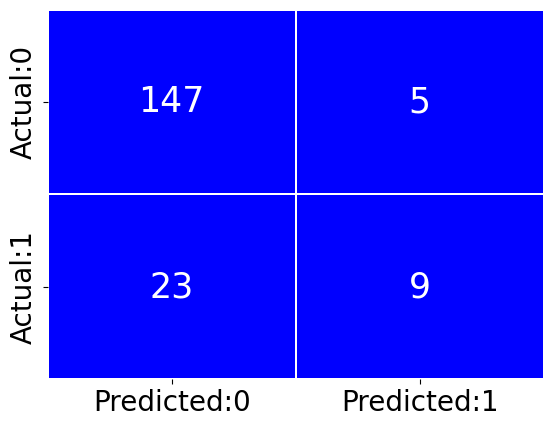

In [92]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [95]:
import sklearn
print(sklearn.__version__)


1.5.1
